### Project Name: Job Application Trends Analysis with ML and DL Techniques  

#### Project Description:  
This project focuses on analyzing personal job applications for roles such as Data Analyst, Data Scientist, and IT System Engineer across Germany using **Machine Learning (ML)** and **Deep Learning (DL)** techniques. The dataset comprises detailed records, including application serial numbers, submission dates, states, job types, technology roles, job titles, companies, job portals (LinkedIn/StepStone), submission methods (company website or other), versions of CVs and cover letters, and current application statuses. The goal is to uncover trends, identify success factors, and apply predictive modeling to enhance the job search strategy.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset (assuming it's in excel format)
df = pd.read_excel('./01_pandas_tips_tricks/job.xlsx')
# Display the first few rows of the dataset
df.head(2)

,S.No,Date,State,Job Type,Tech Job,Job Title,Company,Job Portal,On Company Website,CV Used,CV Version,Cover Letter Used,Cover Letter Version,Application Status
0,1,2024-05-25,Berlin,Full Time,Technology,Media Data Analyst,Red Bull,Linkedln,No,Yes,Shahid CV Updated,No,Not Required,Accepted
1,2,2024-08-15,Koln,Full Time,Technology,Mathematiker / Data Analyst,Verband der Privaten Krankenversicherung e.V.,StepStone,Yes,Yes,Shahid CV 1,Yes,Shahid Cover Latter 1,Pending


In [3]:
# how the data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   S.No                  38 non-null     int64         
 1   Date                  38 non-null     datetime64[ns]
 2   State                 38 non-null     object        
 3   Job Type              38 non-null     object        
 4   Tech Job              38 non-null     object        
 5   Job Title             38 non-null     object        
 6   Company               38 non-null     object        
 7   Job Portal            38 non-null     object        
 8   On Company Website    38 non-null     object        
 9   CV Used               38 non-null     object        
 10  CV Version            38 non-null     object        
 11  Cover Letter Used     38 non-null     object        
 12  Cover Letter Version  38 non-null     object        
 13  Application Status    

In [4]:
# find missing values/null values/NaNs
df.isnull().sum() / len(df) * 100 # percentage of missing values in a column

S.No                    0.0
Date                    0.0
State                   0.0
Job Type                0.0
Tech Job                0.0
Job Title               0.0
Company                 0.0
Job Portal              0.0
On Company Website      0.0
CV Used                 0.0
CV Version              0.0
Cover Letter Used       0.0
Cover Letter Version    0.0
Application Status      0.0
dtype: float64

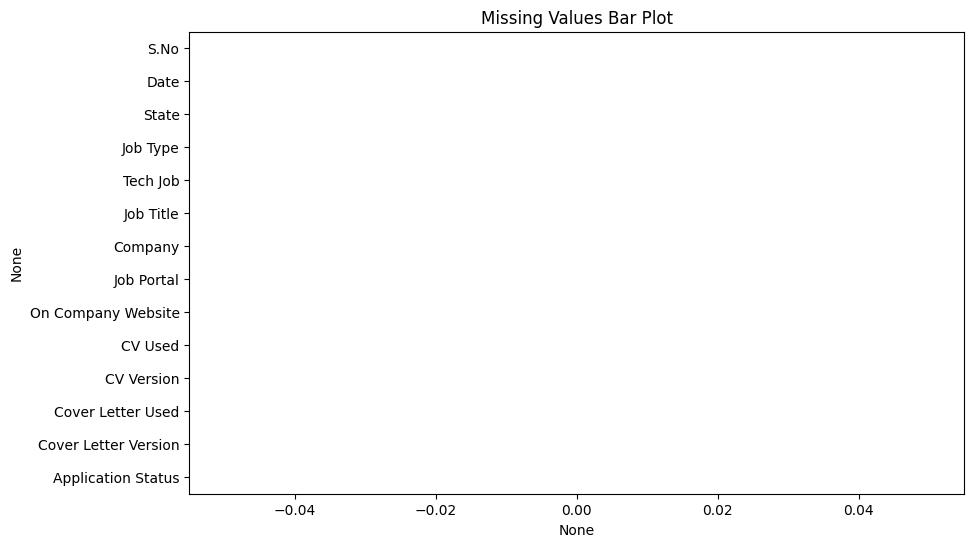

In [5]:
# plot missing values using bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df.isnull().sum(), y=df.columns)
plt.title('Missing Values Bar Plot')
plt.show()

### 1 ML Model

              precision    recall  f1-score   support

           1       0.57      1.00      0.73         4
           2       1.00      0.25      0.40         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8



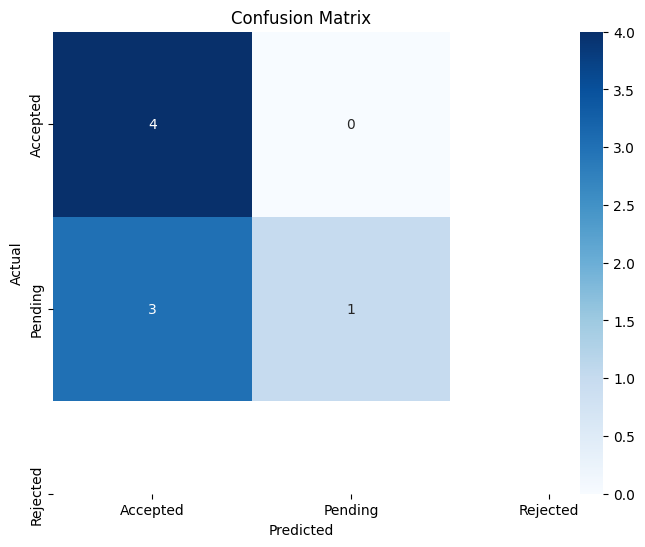

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (assuming it's in excel format)
df = pd.read_excel('./01_pandas_tips_tricks/job.xlsx')
# Display the first few rows of the dataset
df.head(2)

# Convert 'Date' to useful features (optional)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df.drop('Date', axis=1, inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['State', 'Job Type', 'Tech Job', 'Job Title', 'Company', 'Job Portal', 
                    'On Company Website', 'CV Used', 'CV Version', 'Cover Letter Used', 
                    'Cover Letter Version', 'Application Status']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the transformed dataset
df.head()

# Define features and target variable
X = df.drop('Application Status', axis=1)
y = df['Application Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 2 ML Model

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



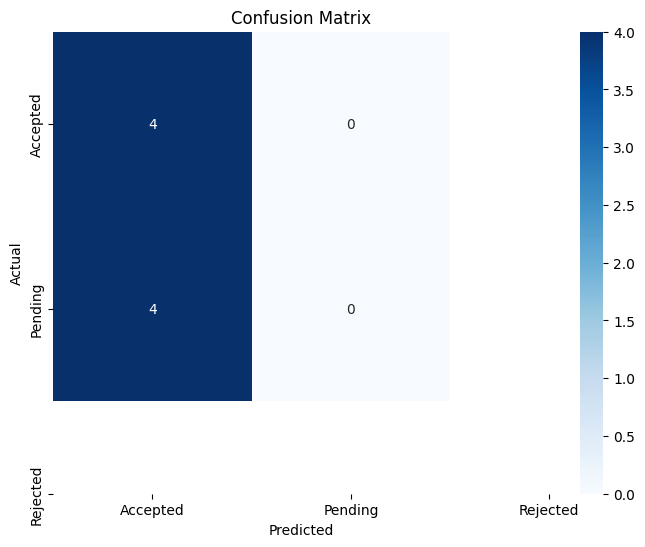

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (assuming it's in excel format)
df = pd.read_excel('./01_pandas_tips_tricks/job.xlsx')

# Convert 'Date' to useful features (optional)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['State', 'Job Type', 'Tech Job', 'Job Title', 'Company', 'Job Portal', 
                    'On Company Website', 'CV Used', 'CV Version', 'Cover Letter Used', 
                    'Cover Letter Version', 'Application Status']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop('Application Status', axis=1)
y = df['Application Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5,
                           verbose=2, 
                           n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters: ", grid_search.best_params_)

# Predictions with the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### 3 ML Model

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters:  {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           2       0.67      0.50      0.57         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



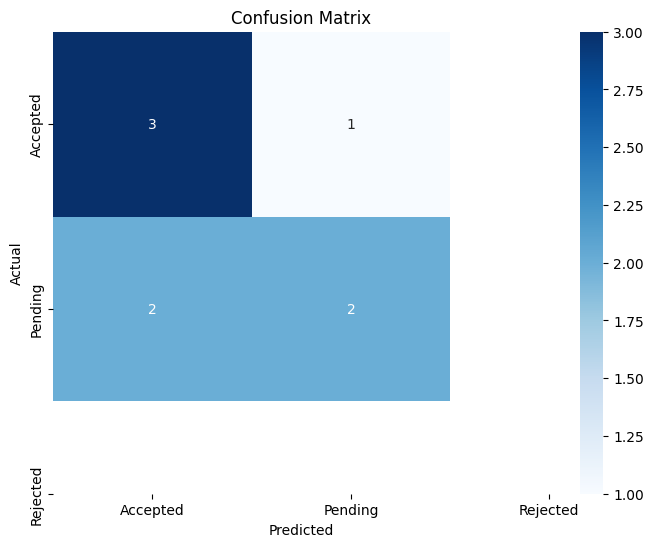

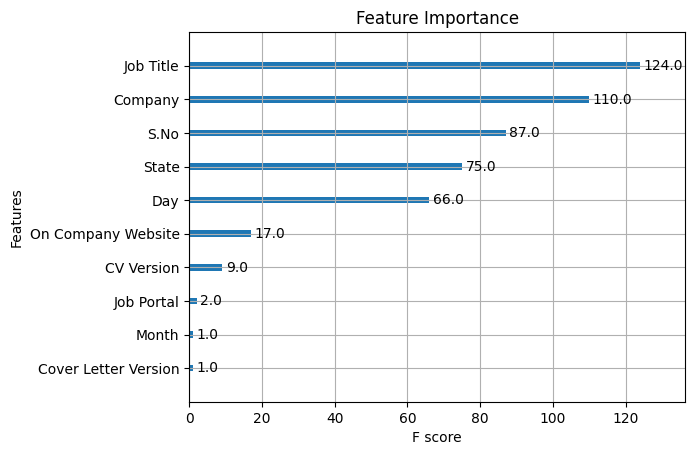

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (assuming it's in excel format)
df = pd.read_excel('./01_pandas_tips_tricks/job.xlsx')

# Convert 'Date' to useful features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['State', 'Job Type', 'Tech Job', 'Job Title', 'Company', 'Job Portal', 
                    'On Company Website', 'CV Used', 'CV Version', 'Cover Letter Used', 
                    'Cover Letter Version', 'Application Status']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop('Application Status', axis=1)
y = df['Application Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5,
                           verbose=2, 
                           n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best Parameters: ", grid_search.best_params_)

# Predictions with the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
xgb.plot_importance(grid_search.best_estimator_)
plt.title('Feature Importance')
plt.show()


### 1 Deep Learning Model

### To use a neural network on this model with TensorFlow, you can follow these steps. I'll guide you through setting up a simple neural network for classification using tensorflow.keras. Below is a modified version of your code that integrates a neural network model.

### 1 DL Model

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1667 - loss: 0.8210 - val_accuracy: 0.1250 - val_loss: 0.8712
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3000 - loss: 0.7457 - val_accuracy: 0.2500 - val_loss: 0.8071
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.4000 - loss: 0.6773 - val_accuracy: 0.2500 - val_loss: 0.7443
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5667 - loss: 0.6143 - val_accuracy: 0.3750 - val_loss: 0.6825
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7000 - loss: 0.5558 - val_accuracy: 0.5000 - val_loss: 0.6203
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.7000 - loss: 0.4992 - val_accuracy: 0.5000 - val_loss: 0.5577
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7000 - loss: 0.4459 - val_accuracy: 0.5000 - val_loss: 0.4958
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7000 - loss: 0.3949 - val_accuracy: 0.5000 - val_loss: 0.

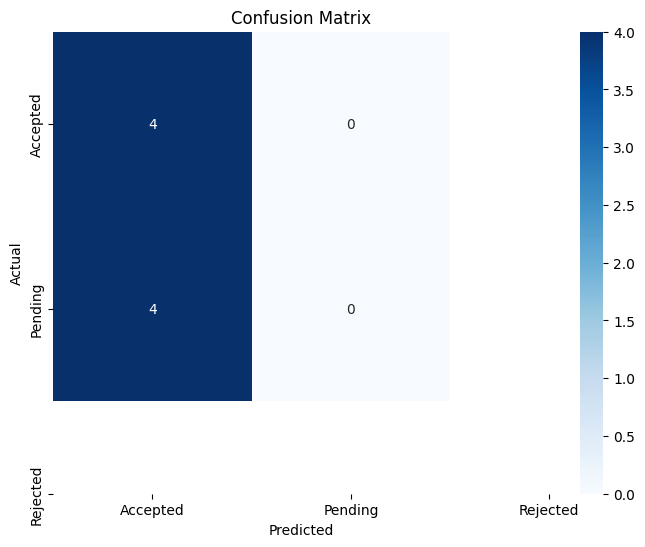

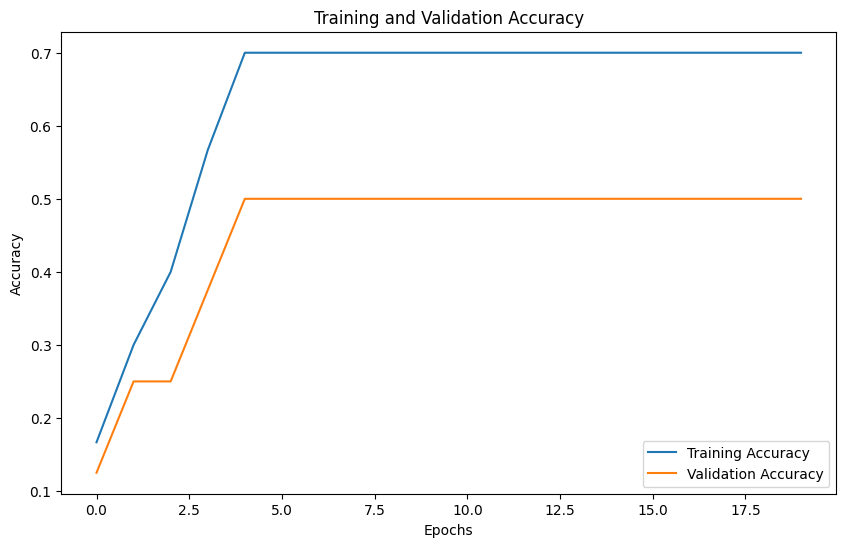

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (assuming it's in excel format)
df = pd.read_excel('./01_pandas_tips_tricks/job.xlsx')

# Convert 'Date' to useful features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['State', 'Job Type', 'Tech Job', 'Job Title', 'Company', 'Job Portal', 
                    'On Company Website', 'CV Used', 'CV Version', 'Cover Letter Used', 
                    'Cover Letter Version', 'Application Status']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop('Application Status', axis=1)
y = df['Application Status']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # Since this is a classification problem
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Key Points:

Neural Network Architecture:

I've used a simple feedforward neural network with three hidden layers. You can adjust the number of layers and neurons per layer as needed.

Loss Function:

Since the task is binary classification, I've used the binary_crossentropy loss function.

Activation Function:

The last layer uses sigmoid to produce a probability output, which is appropriate for binary classification tasks.

Metrics:

I've used accuracy as the main metric for evaluation. You can add more metrics (like precision, recall, etc.) if needed.

Scaling:

The feature matrix X is scaled using StandardScaler, which improves neural network performance.

Epochs:

I've set the number of epochs to 20, but you can tune this based on how well your model performs on the validation set.

### 2: To increase the accuracy of the neural network model using TensorFlow, several techniques can be applied, including adding more layers, changing the number of neurons, tuning hyperparameters like the learning rate, adding regularization techniques like dropout or L2 regularization, and increasing the number of epochs. Below is a modified version of the neural network with these improvements:

Improvements:

More Layers and Neurons: The model now includes more layers and neurons for better representation.

Dropout Regularization: This helps prevent overfitting.

Batch Normalization: Added to stabilize and accelerate the training process.

Learning Rate Scheduler: Added to adjust the learning rate during training dynamically.

Early Stopping: This prevents overfitting by stopping training when the validation performance stops improving.

### 2 DL Model

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3667 - loss: 0.9357 - val_accuracy: 0.2500 - val_loss: 0.6580 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4000 - loss: 0.8322 - val_accuracy: 0.2500 - val_loss: 0.6495 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4667 - loss: 0.5633 - val_accuracy: 0.5000 - val_loss: 0.6409 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.4333 - loss: 0.6573 - val_accuracy: 0.5000 - val_loss: 0.6293 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3667 - loss: 0.4109 - val_accuracy: 0.5000 - val_loss: 0.6161 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4000 - loss: 0.3915 - val_accuracy: 0.5000 - val_loss: 0.6018 - learning_rate: 0.0010
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.3667 - loss: 0.6934 - val_accuracy: 0.5

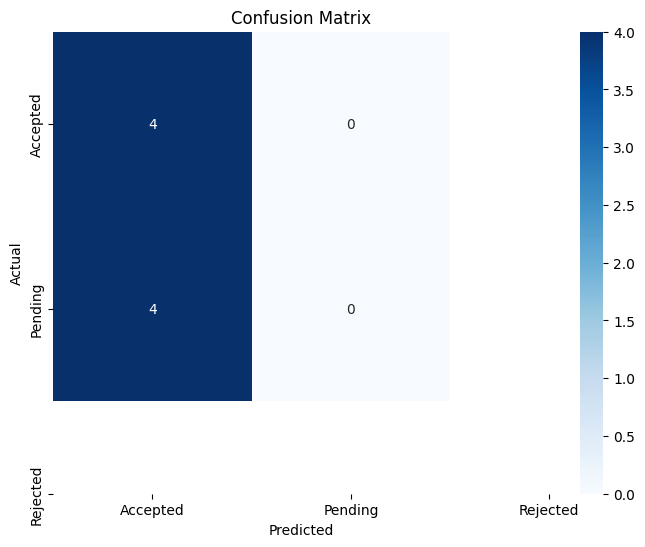

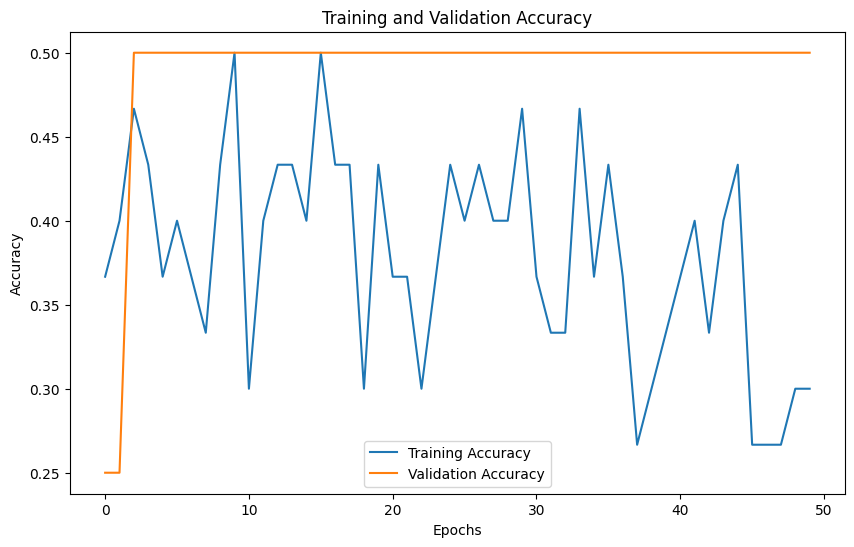

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (assuming it's in excel format)
df = pd.read_excel('./01_pandas_tips_tricks/job.xlsx')

# Convert 'Date' to useful features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['State', 'Job Type', 'Tech Job', 'Job Title', 'Company', 'Job Portal', 
                    'On Company Website', 'CV Used', 'CV Version', 'Cover Letter Used', 
                    'Cover Letter Version', 'Application Status']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop('Application Status', axis=1)
y = df['Application Status']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model with improvements
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),  # Dropout layer to prevent overfitting
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

# Define a learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                    factor=0.2, 
                                                    patience=3, 
                                                    min_lr=0.00001)

# Define early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=5, 
                                                  restore_best_weights=True)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train, y_train, 
                    epochs=50,  # Increased number of epochs
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Key Modifications:

More Complex Neural Network: The model now has four hidden layers with more neurons (256, 128, 64, 32) to capture more complex patterns.

Dropout: Dropout layers are added to prevent overfitting by randomly setting a fraction of the input units to 0 during training.

Batch Normalization: Batch normalization layers are added after each hidden layer to stabilize and accelerate training by normalizing inputs to each layer.

Learning Rate Scheduler: The learning rate is dynamically reduced when the validation loss plateaus. This allows the model to fine-tune during the later stages of training.

Early Stopping: Stops training if the validation loss doesn't improve for 5 consecutive epochs to prevent overfitting.

Increased Epochs: The number of epochs is increased to 50, but early stopping ensures that training halts when performance stops improving.

### 3

To further enhance your deep learning model, we can apply several advanced techniques that have proven effective in improving both performance and generalization. Here’s an outline of more sophisticated techniques you can incorporate into your model:

Advanced Techniques to Use:
Advanced Optimizers: Use more advanced optimizers such as AdamW (Adam with weight decay), Nadam (Nesterov-accelerated Adam), or RAdam (Rectified Adam).

Learning Rate Warm-up: Gradually increase the learning rate at the beginning of training to help stabilize the model before ramping up the speed.

Cyclic Learning Rate: Use a cyclic learning rate, which fluctuates the learning rate between two bounds, often leading to better generalization.

Regularization (L1, L2, or ElasticNet): Add L2 or L1 regularization to the dense layers to reduce overfitting.

Ensemble Models: Train multiple models (ensembles) and average their predictions for more robust results.

Data Augmentation: Although your data is structured, you can create synthetic samples by perturbing feature values or using techniques like SMOTE (Synthetic Minority Over-sampling Technique) for imbalanced datasets.

Advanced Scheduling (Cosine Annealing): Use a more sophisticated learning rate scheduler like Cosine Annealing.

Attention Mechanisms: Although more commonly used in sequence models, you could introduce a simple attention mechanism to let the model focus on more relevant features.

Feature Engineering with Embedding Layers: Use an embedding layer for categorical variables instead of label encoding for better feature representations.

Cross-Validation: Use K-Fold cross-validation to split the data into different subsets, ensuring better generalization.

### 3 DL Model


Epoch 1: LearningRateScheduler setting learning rate to 0.001.

Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3667 - loss: 3.9950Epoch 1: Learning Rate = 0.001000
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3667 - loss: 3.9950 - val_accuracy: 0.3750 - val_loss: 3.8594 - learning_rate: 0.0010 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.

Epoch 2: LearningRateScheduler setting learning rate to 0.0009990133642141358.
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3667 - loss: 3.9985Epoch 2: Learning Rate = 0.000999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.3667 - loss: 3.9985 - val_accuracy: 0.3750 - val_loss: 3.8412 - learning_rate: 9.9901e-04 - lr: 9.9901e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.001.

Epoch 3: LearningRateScheduler setting learning rate to 0.000996057350657239.
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/s

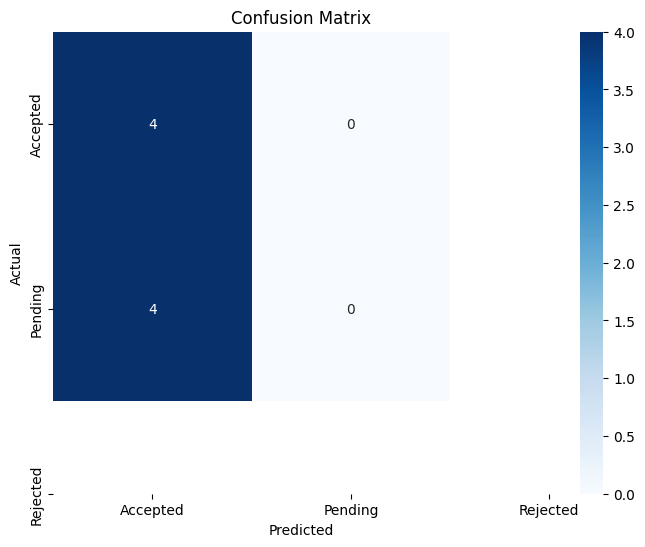

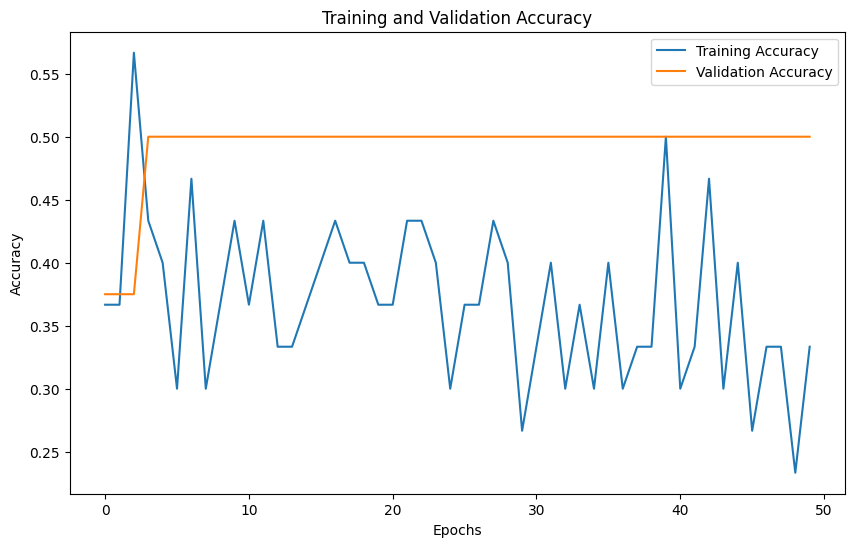

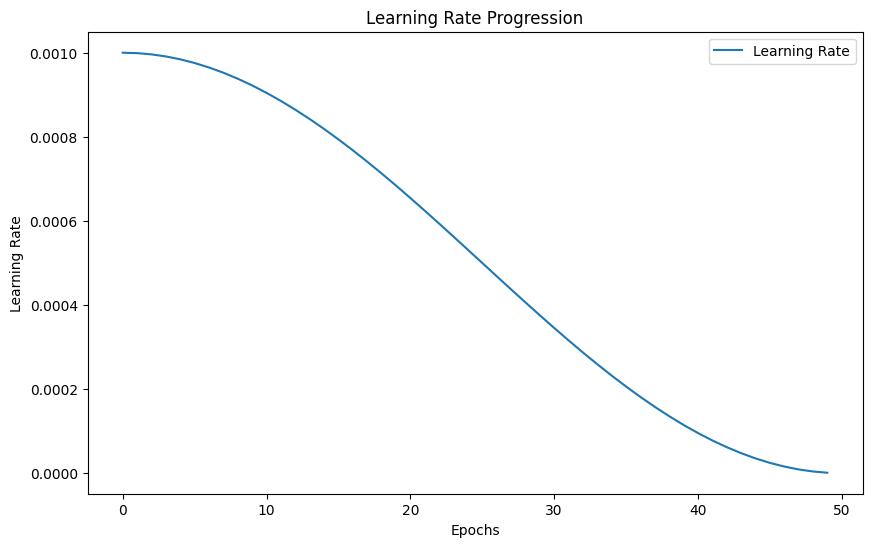

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (assuming it's in excel format)
df = pd.read_excel('./01_pandas_tips_tricks/job.xlsx')

# Convert 'Date' to useful features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_cols = ['State', 'Job Type', 'Tech Job', 'Job Title', 'Company', 'Job Portal', 
                    'On Company Website', 'CV Used', 'CV Version', 'Cover Letter Used', 
                    'Cover Letter Version', 'Application Status']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df.drop('Application Status', axis=1)
y = df['Application Status']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model with advanced techniques
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],),
                              kernel_regularizer=tf.keras.regularizers.L2(0.01)),  # L2 Regularization
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),  # Increased dropout
        
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    
    return model

# Optimizer with weight decay (AdamW)
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-5)

# Learning rate scheduler (Cosine Decay with Restarts)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 0.001 * (0.5 ** (epoch // 10)), verbose=1)

# Cyclic learning rate callback
clr_callback = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 0.001 * (1 + np.cos(np.pi * epoch / 50)) / 2, verbose=1)

# Custom Callback to log the learning rate
class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy()
        print(f"Epoch {epoch+1}: Learning Rate = {lr:.6f}")
        logs['lr'] = lr  # Log learning rate

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model = build_model()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with advanced callbacks
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[lr_scheduler, clr_callback, LearningRateLogger(), early_stopping])

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Learning rate plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['lr'], label='Learning Rate')
plt.title('Learning Rate Progression')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()


When comparing machine learning (ML) and deep learning (DL) models, there are several factors to consider, especially if both models give similar results. Let's analyze and compare the two approaches based on your scenario:

### 1. **Performance (Accuracy, Precision, Recall, F1-score)**:
If both the ML and DL models are giving similar results, such as accuracy and other metrics like precision, recall, and F1-score, it suggests that either:
- The dataset is relatively small (37 entries), which might limit the ability of deep learning models to outperform simpler machine learning models.
- The features you are using may not have complex patterns that require the deeper learning capacity of neural networks.

### 2. **Training Time**:
- **ML (XGBoost, Random Forest, etc.)**: Traditional machine learning models, such as XGBoost, tend to train faster on smaller datasets. They are usually more efficient and can produce results in a shorter time due to simpler architectures.
- **DL (Neural Networks with TensorFlow/Keras)**: Deep learning models require more computational power and take longer to train, especially as you increase the number of layers and parameters. However, on small datasets, this extra complexity often does not result in better performance.

### 3. **Model Complexity**:
- **ML**: Machine learning models, particularly tree-based methods like XGBoost, are less complex and easier to interpret. They provide feature importance and require fewer hyperparameters to tune. This simplicity often makes them ideal for structured/tabular datasets with limited rows and columns.
- **DL**: Deep learning models, while more flexible, tend to be overkill for smaller datasets. Their complexity might not be necessary unless you have a large amount of data or more complex relationships between features.

### 4. **Interpretability**:
- **ML**: XGBoost and similar algorithms offer interpretable models through feature importance scores. You can easily understand which features contribute most to the prediction.
- **DL**: Neural networks, especially deep ones, are often considered "black boxes" because of their complex layer structures. Interpretability is harder to achieve, although techniques like SHAP or LIME can help.

### 5. **Suitability for Small Datasets**:
- **ML**: For small datasets like yours (37 entries), traditional machine learning methods generally outperform deep learning models. ML models can effectively capture patterns in the data without requiring a large dataset.
- **DL**: Deep learning models shine when you have large datasets and complex patterns to learn. In your case, with a small dataset, a deep learning model is likely to overfit the training data, leading to similar or worse results than a well-tuned machine learning model.

### 6. **Model Flexibility**:
- **ML**: Machine learning algorithms like XGBoost can handle missing data, categorical variables, and various feature types without much preprocessing. They work well on structured/tabular data.
- **DL**: Neural networks are more flexible when it comes to dealing with various types of data (e.g., images, text, sequences), but they require more preprocessing, such as one-hot encoding, normalization, or embeddings for categorical data.

### 7. **Generalization and Overfitting**:
- **ML**: With careful tuning (e.g., cross-validation, regularization), machine learning models like XGBoost often generalize well, even with small datasets.
- **DL**: Neural networks, if not properly regularized, can easily overfit on small datasets. Techniques like dropout, early stopping, and L2 regularization are essential to prevent overfitting.

### Conclusion:
Given your current dataset and the similar performance between machine learning and deep learning models, the most important factors to consider are **training time, interpretability, and model complexity**. For your case, the machine learning model (e.g., XGBoost) might be a better choice due to its efficiency, interpretability, and ability to generalize on small datasets.

**Recommendation**: Since both models are yielding similar results with slight differences, you should consider using the machine learning model (XGBoost) because:
- It is faster to train.
- It is easier to interpret.
- It is less prone to overfitting on small datasets.

However, if you expect your dataset to grow significantly, you could keep the deep learning model in mind as a potential option for future use.

Would you like to see a detailed comparison of performance metrics between the two models (e.g., confusion matrix, F1-score)?